In [1]:
import os, sys
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt

from src.flocking_sim import run_simulation
from src.metrics import nearest_neighbor_distance, largest_cluster_fraction

# match universe notebook settings
box_size = 1.0
eps = 0.05
steps = 400
N = 200

# make sure figures folder exists
os.makedirs(os.path.abspath("../figures"), exist_ok=True)

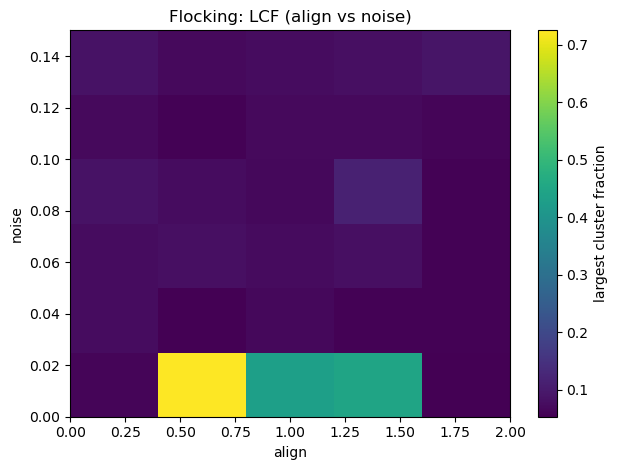

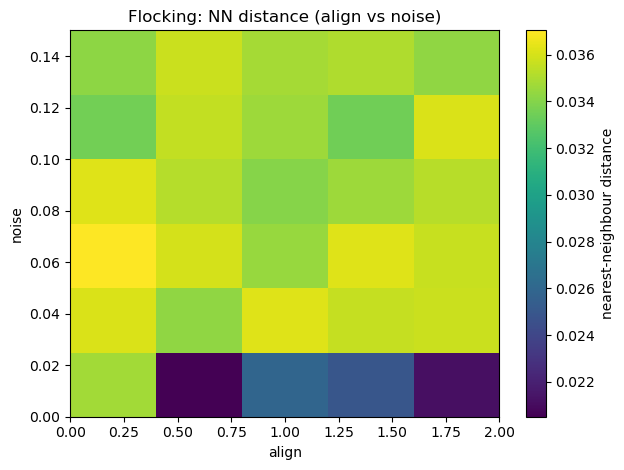

In [2]:
align_vals = [0.0, 0.5, 1.0, 1.5, 2.0]
noise_vals = [0.0, 0.03, 0.06, 0.09, 0.12, 0.15]

R = 3 * eps          # 0.15
speed = 0.03
seeds = [0, 1, 2]    # average over seeds (more scientific)

LCF = np.zeros((len(noise_vals), len(align_vals)))
NN  = np.zeros_like(LCF)

for i, noise in enumerate(noise_vals):
    for j, align in enumerate(align_vals):

        lcf_runs = []
        nn_runs = []

        for s in seeds:
            hist = run_simulation(
                N=N, steps=steps, box_size=box_size,
                align=align, noise=noise, R=R, speed=speed,
                seed=s, save_every=steps
            )
            pos = hist[-1]
            lcf_runs.append(largest_cluster_fraction(pos, eps=eps, box_size=box_size))
            nn_runs.append(nearest_neighbor_distance(pos, box_size=box_size))

        LCF[i, j] = np.mean(lcf_runs)
        NN[i, j]  = np.mean(nn_runs)

# Plot + save LCF
plt.figure()
plt.imshow(LCF, origin="lower", aspect="auto",
           extent=[min(align_vals), max(align_vals), min(noise_vals), max(noise_vals)])
plt.colorbar(label="largest cluster fraction")
plt.xlabel("align")
plt.ylabel("noise")
plt.title("Flocking: LCF (align vs noise)")
plt.tight_layout()
plt.savefig("../figures/flock_align_noise_lcf.png", dpi=200)
plt.show()

# Plot + save NN
plt.figure()
plt.imshow(NN, origin="lower", aspect="auto",
           extent=[min(align_vals), max(align_vals), min(noise_vals), max(noise_vals)])
plt.colorbar(label="nearest-neighbour distance")
plt.xlabel("align")
plt.ylabel("noise")
plt.title("Flocking: NN distance (align vs noise)")
plt.tight_layout()
plt.savefig("../figures/flock_align_noise_nn.png", dpi=200)
plt.show()

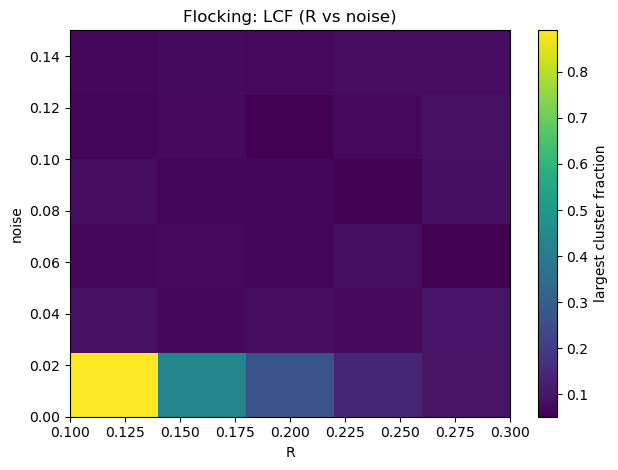

In [5]:
R_vals = [2*eps, 3*eps, 4*eps, 5*eps, 6*eps]   # 0.10 to 0.30
noise_vals = [0.0, 0.03, 0.06, 0.09, 0.12, 0.15]

align = 1.0
speed = 0.03
seeds = [0, 1, 2]

LCF2 = np.zeros((len(noise_vals), len(R_vals)))

for i, noise in enumerate(noise_vals):
    for j, R in enumerate(R_vals):

        lcf_runs = []
        for s in seeds:
            hist = run_simulation(
                N=N, steps=steps, box_size=box_size,
                align=align, noise=noise, R=R, speed=speed,
                seed=s, save_every=steps
            )
            pos = hist[-1]
            lcf_runs.append(largest_cluster_fraction(pos, eps=eps, box_size=box_size))

        LCF2[i, j] = np.mean(lcf_runs)

plt.figure()
plt.imshow(LCF2, origin="lower", aspect="auto",
           extent=[min(R_vals), max(R_vals), min(noise_vals), max(noise_vals)])
plt.colorbar(label="largest cluster fraction")
plt.xlabel("R")
plt.ylabel("noise")
plt.title("Flocking: LCF (R vs noise)")
plt.tight_layout()
plt.savefig("../figures/flock_R_noise_lcf.png", dpi=200)
plt.show()

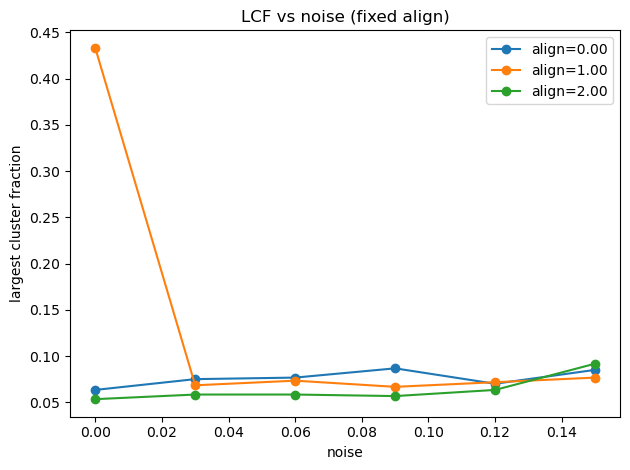

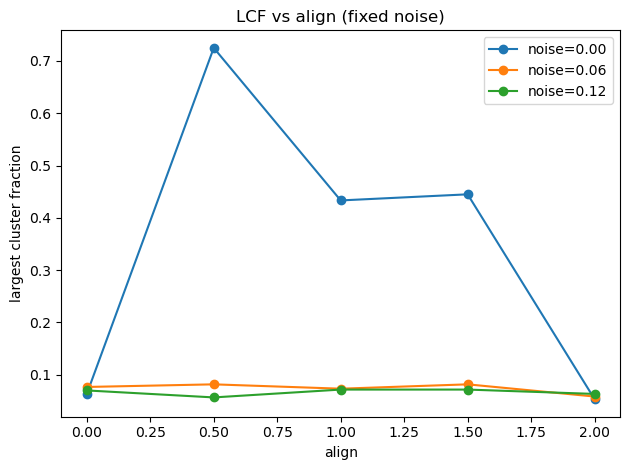

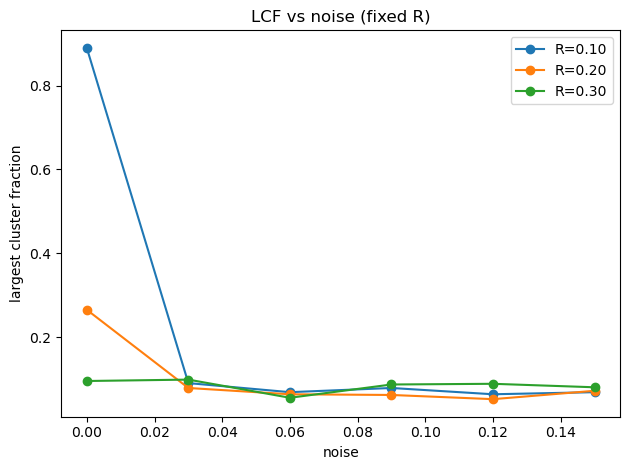

In [6]:
def nearest_index(values, target):
    values = np.array(values, dtype=float)
    return int(np.argmin(np.abs(values - target)))

align_vals_np = np.array(align_vals, dtype=float)
noise_vals_np = np.array(noise_vals, dtype=float)


# 1) LCF vs noise for fixed align
plt.figure()
for a_pick in [0.0, 1.0, 2.0]:
    j = nearest_index(align_vals_np, a_pick)
    plt.plot(noise_vals_np, LCF[:, j], marker="o", label=f"align={align_vals_np[j]:.2f}")
plt.xlabel("noise")
plt.ylabel("largest cluster fraction")
plt.title("LCF vs noise (fixed align)")
plt.legend()
plt.tight_layout()
plt.savefig("../figures/line_lcf_vs_noise_fixed_align.png", dpi=200)
plt.show()



# 2) LCF vs align for fixed noise
plt.figure()
for n_pick in [0.0, 0.06, 0.12]:
    i = nearest_index(noise_vals_np, n_pick)
    plt.plot(align_vals_np, LCF[i, :], marker="o", label=f"noise={noise_vals_np[i]:.2f}")
plt.xlabel("align")
plt.ylabel("largest cluster fraction")
plt.title("LCF vs align (fixed noise)")
plt.legend()
plt.tight_layout()
plt.savefig("../figures/line_lcf_vs_align_fixed_noise.png", dpi=200)
plt.show()



# 3) LCF vs noise for fixed R
R_vals_np = np.array(R_vals, dtype=float)

plt.figure()
for R_pick in [R_vals_np[0], R_vals_np[len(R_vals_np)//2], R_vals_np[-1]]:
    j = nearest_index(R_vals_np, R_pick)
    plt.plot(noise_vals_np, LCF2[:, j], marker="o", label=f"R={R_vals_np[j]:.2f}")
plt.xlabel("noise")
plt.ylabel("largest cluster fraction")
plt.title("LCF vs noise (fixed R)")
plt.legend()
plt.tight_layout()
plt.savefig("../figures/line_lcf_vs_noise_fixed_R.png", dpi=200)
plt.show()